In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
# import function to perform feature selection
from sklearn.feature_selection import RFE

In [43]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
import random
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [3]:
train=pd.read_csv('train_s3TEQDk.csv')
test=pd.read_csv('test_mSzZ8RL.csv')

In [ ]:
# Checking shape of Dataset

In [4]:
train.shape

(245725, 11)

In [5]:
test.shape

(105312, 10)

In [ ]:
# Checking data type of features

In [7]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [9]:
test.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [ ]:
#Checking for Duplicate Values

In [10]:
train.duplicated().sum()

0

In [11]:
test.duplicated().sum()

0

In [ ]:
#Checking for Null Values

In [14]:
train.isnull().sum().sort_values(ascending=False)

Credit_Product         29325
Is_Lead                    0
Is_Active                  0
Avg_Account_Balance        0
Vintage                    0
Channel_Code               0
Occupation                 0
Region_Code                0
Age                        0
Gender                     0
ID                         0
dtype: int64

In [13]:
test.isnull().sum().sort_values(ascending=False)

Credit_Product         12522
Is_Active                  0
Avg_Account_Balance        0
Vintage                    0
Channel_Code               0
Occupation                 0
Region_Code                0
Age                        0
Gender                     0
ID                         0
dtype: int64

In [15]:
train['Credit_Product']=train['Credit_Product'].fillna('Yes')
test['Credit_Product']=test['Credit_Product'].fillna('Yes')

In [ ]:
#Handling Outliers

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


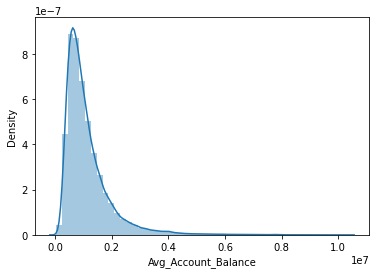

In [16]:
sns.distplot(train['Avg_Account_Balance'])
plt.show()

C:\Users\AS20188795\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


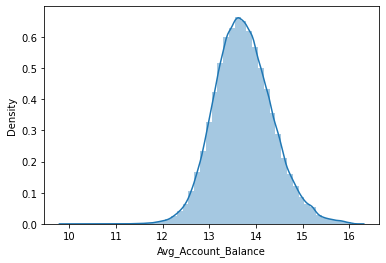

In [17]:
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])
sns.distplot(train['Avg_Account_Balance'])
plt.show()

In [ ]:
#Label Encoding

In [19]:
le = LabelEncoder()
train['Gender']= le.fit_transform(train['Gender'])
train['Occupation']= le.fit_transform(train['Occupation'])
train['Credit_Product']= le.fit_transform(train['Credit_Product'])
train['Vintage']= le.fit_transform(train['Vintage'])
train['Region_Code']= le.fit_transform(train['Region_Code'])
train['Channel_Code']= le.fit_transform(train['Channel_Code'])
train['Age']= le.fit_transform(train['Age'])
train['Is_Lead']= le.fit_transform(train['Is_Lead'])
train['Is_Active']= le.fit_transform(train['Is_Active'])
train['ID']= le.fit_transform(train['ID'])

In [20]:
test['Gender']= le.fit_transform(test['Gender'])
test['Occupation']= le.fit_transform(test['Occupation'])
test['Credit_Product']= le.fit_transform(test['Credit_Product'])
test['Vintage']= le.fit_transform(test['Vintage'])
test['Region_Code']= le.fit_transform(test['Region_Code'])
test['Channel_Code']= le.fit_transform(test['Channel_Code'])
test['Age']= le.fit_transform(test['Age'])
test['Is_Active']= le.fit_transform(test['Is_Active'])
test['ID']= le.fit_transform(test['ID'])

In [ ]:
#Our target variable is unbalanced dataset

In [22]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [23]:
y=train.iloc[:,10:]
x=train.iloc[:,0:10]

In [24]:
test=test.iloc[:,0:10]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=60)

In [48]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_train = logreg.predict(x_test)

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy Score 0.7487606363300037
[[59214 17818]
 [ 2555  1503]]
Precision : 0.07779100460638683
Recall : 0.3703794972893051
Specificity : 0.7686935299615744
F1 Score : 0.12857692801231874
Accuracy : 0.7487606363300037
kappa value: 0.04999862581459569


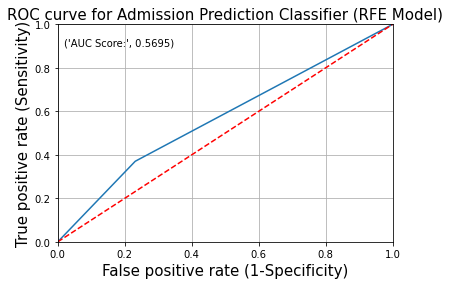

In [49]:
print('Accuracy Score',metrics.accuracy_score(y_pred_train,y_test))
cm = metrics.confusion_matrix(y_pred_train, y_test)
print(cm)
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
precision = TP / (TP+FP)
print('Precision :',precision)
recall = TP / (TP+FN)
print('Recall :',recall)
specificity = TN / (TN+FP)
print('Specificity :',specificity)
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 Score :',f1_score)
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy :',accuracy)
fpr, tpr, thresholds = roc_curve(y_pred_train, y_test)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Admission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_pred_train, y_test),4)))
plt.grid(True)
kappa = cohen_kappa_score(y_pred_train, y_test)
print('kappa value:',kappa)

In [33]:
import xgboost as xg
from xgboost import XGBClassifier
 
clf2 = xg.XGBClassifier(class_weight='balanced').fit(x_train, y_train)

[14:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
from sklearn.utils import class_weight
class_weight.compute_class_weight('balanced', np.unique(y_train), y_train['Is_Lead'])

C:\Users\AS20188795\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=69020     1
231719    0
78458     1
198158    0
139279    1
         ..
174179    0
6543      0
241222    0
232513    0
133325    0
Name: Is_Lead, Length: 164635, dtype: int64 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([0.65503947, 2.11249262])

In [37]:
Y_Test_Pred = clf2.predict(x_test)

C:\Users\AS20188795\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [44]:
generate_model_report(y_test, Y_Test_Pred)

Accuracy =  0.8229498088543593
Precision =  0.654391639711371
Recall =  0.5444852750892811
F1 Score =  0.594400655422776


C:\Users\AS20188795\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


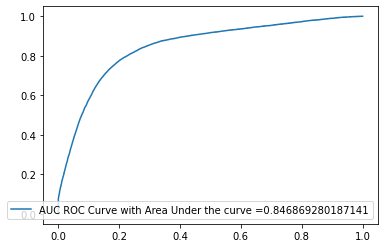

In [46]:
generate_auc_roc_curve(clf2, X_test)

In [39]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [45]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass